# **Overview of Titanic Survival Classifier**

This code demonstrates a comprehensive workflow for a machine learning project aimed at predicting the survival of passengers on the Titanic using the Titanic dataset. Below is an overview of each step and the corresponding actions taken:

1. **Importing Libraries**:
   - Essential libraries for data manipulation, visualization, and machine learning are imported, such as pandas, numpy, matplotlib, seaborn, and scikit-learn.

2. **Mounting Google Drive**:
   - The user's Google Drive is mounted to access the dataset stored in Google Drive.

3. **Loading the Dataset**:
   - The Titanic dataset is loaded into a pandas DataFrame from a CSV file.

4. **Exploratory Data Analysis (EDA)**:
   - The columns and last few rows of the dataset are displayed.
   - A heatmap is used to visualize missing data.
   - Counts of missing values for each column are displayed.
   - Several count plots are created to visualize the distribution of the target variable (`Survived`) with respect to different features (`Sex`, `Pclass`, `SibSp`, `Parch`).
   - Histograms and box plots are used to visualize distributions of numerical features (`Age`, `Fare`) and their relationships with categorical features (`Pclass`).

5. **Data Cleaning and Imputation**:
   - A custom function `impute_age` is defined to fill in missing `Age` values based on `Pclass`.
   - Missing `Embarked` values are filled with the most common port of embarkation ('S').
   - The `Cabin` column, which has many missing values, is dropped.
   - Remaining missing values are dropped.

6. **Feature Engineering**:
   - Categorical features (`Sex`, `Embarked`) are converted into dummy variables.
   - Irrelevant columns (`Sex`, `Embarked`, `Name`, `Ticket`) are dropped.
   - The original DataFrame is concatenated with the newly created dummy variables.

7. **Model Training and Evaluation**:
   - The data is split into training and testing sets using `train_test_split`.
   - A RandomForestClassifier model is instantiated and trained on the training set.
   - Predictions are made on the test set.
   - The model's performance is evaluated using a confusion matrix, accuracy score, and classification report.
   - A heatmap is used to visualize the confusion matrix.

8. **Prediction Function**:
   - A function `predict_survival` is defined to predict the survival of new passengers based on the trained model.
   - An example usage of this function is demonstrated with a sample input.

### Summary:
This workflow covers all necessary steps from loading data, performing exploratory data analysis, cleaning and preparing data, training a machine learning model, evaluating its performance, and making predictions. It serves as a good example of a typical machine learning pipeline.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline
from google.colab import drive
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_classification.csv')

In [84]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: >

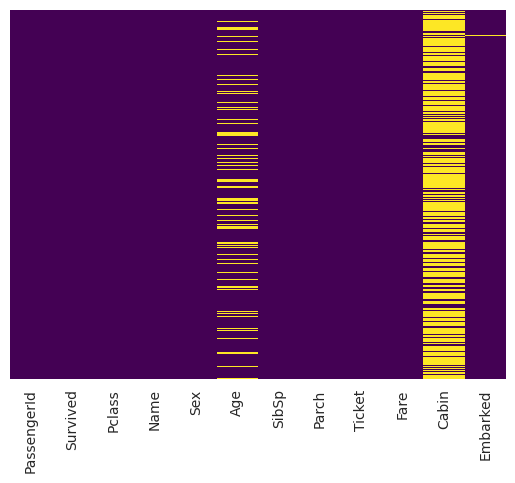

In [86]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [87]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<ipython-input-88-05742e5567b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

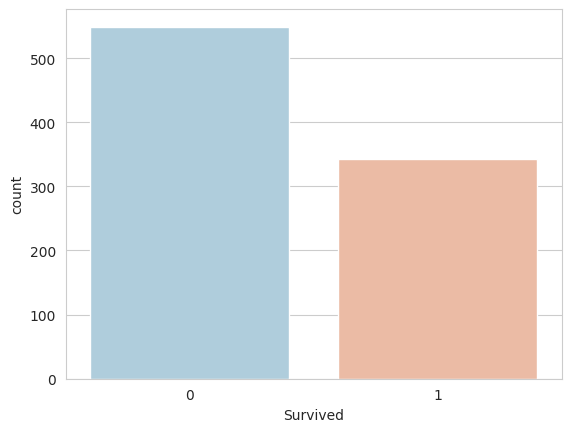

In [88]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

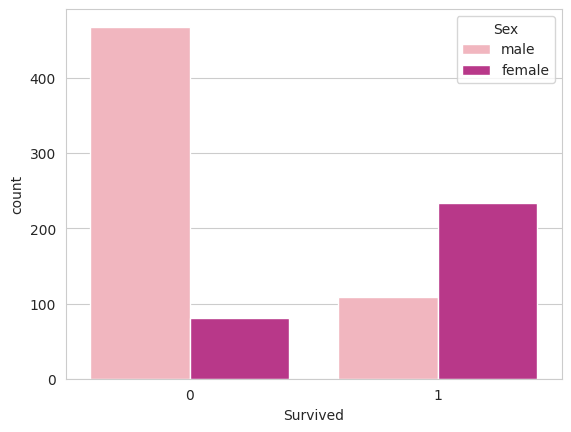

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdPu')

<Axes: xlabel='Survived', ylabel='count'>

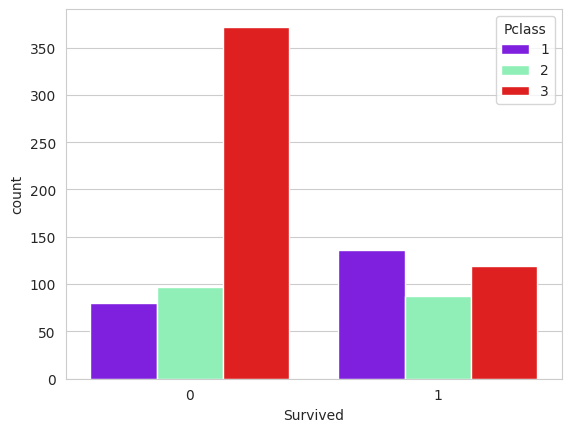

In [90]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: >

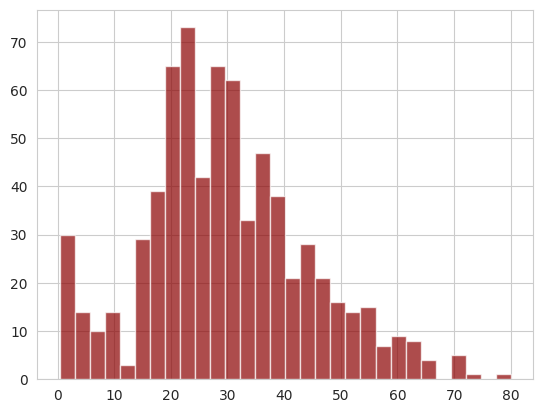

In [91]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

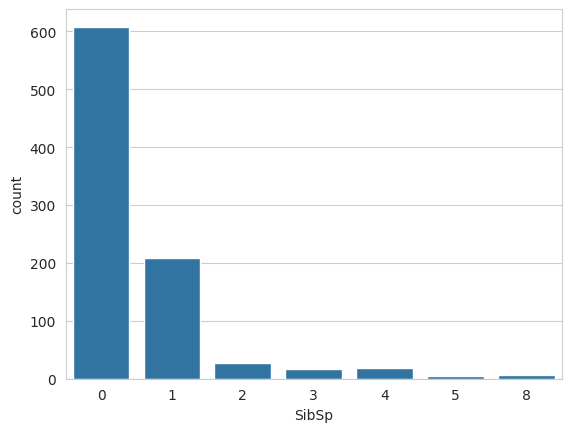

In [92]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Parch', ylabel='count'>

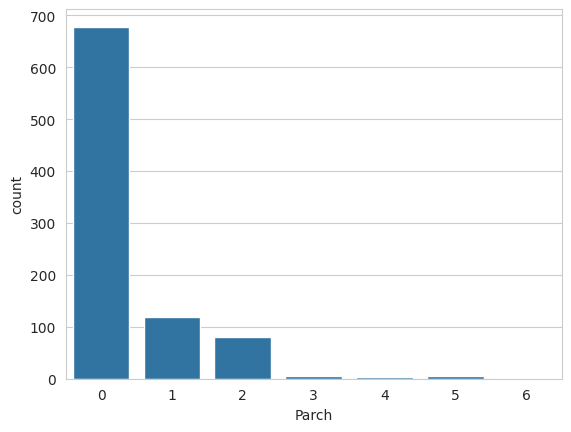

In [93]:
sns.countplot(x='Parch',data=train)

<Axes: >

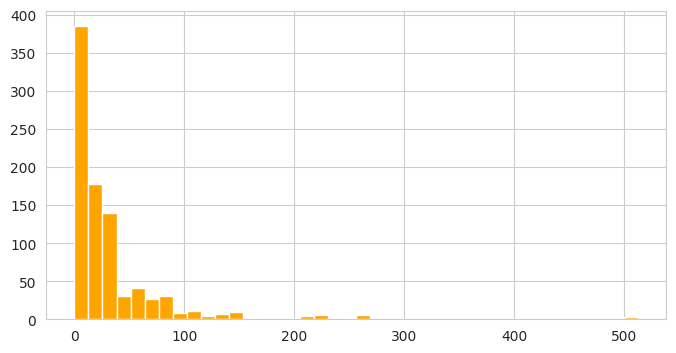

In [94]:
train['Fare'].hist(color='orange',bins=40,figsize=(8,4))

<ipython-input-95-551bc5ec5847>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

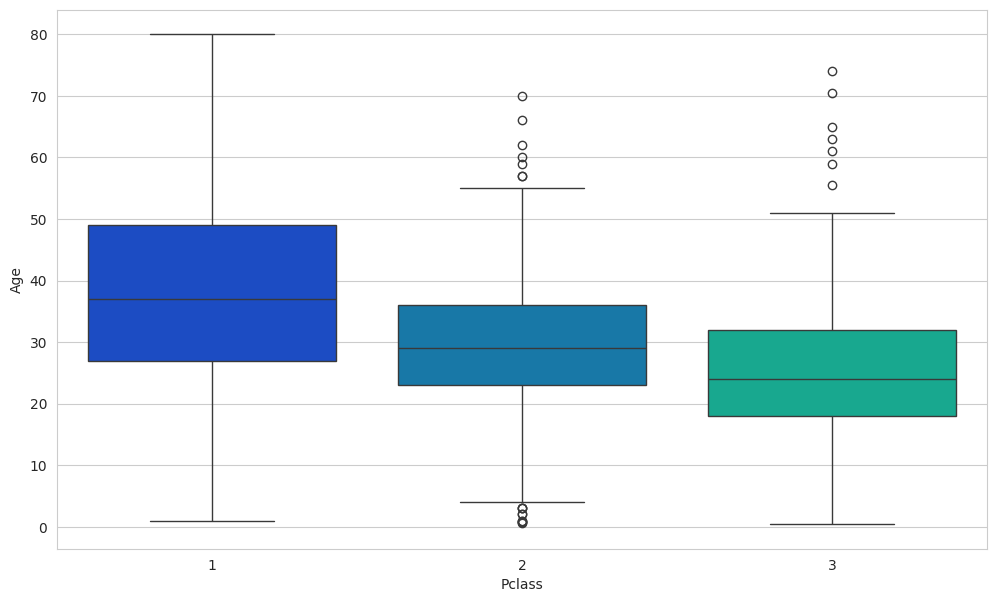

In [95]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [96]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [97]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [98]:
train['Embarked'] = train['Embarked'].fillna('S')

<Axes: >

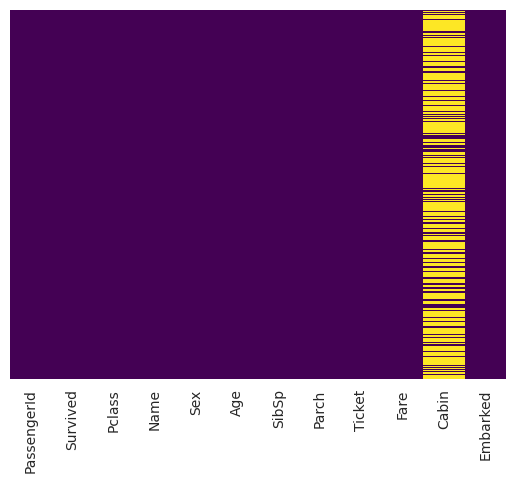

In [99]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [100]:
train.drop('Cabin',axis=1,inplace=True)

In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [102]:
train.dropna(inplace=True)

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [104]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [105]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [106]:
train = pd.concat([train,sex,embark],axis=1)

In [107]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),
                                                    train['Survived'], test_size=0.10,
                                                    random_state=101)

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [112]:
rf_pre=rf.predict(X_test)

In [113]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [15 24]]


In [114]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, rf_pre)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [115]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        51
           1       0.89      0.62      0.73        39

    accuracy                           0.80        90
   macro avg       0.83      0.78      0.78        90
weighted avg       0.82      0.80      0.79        90



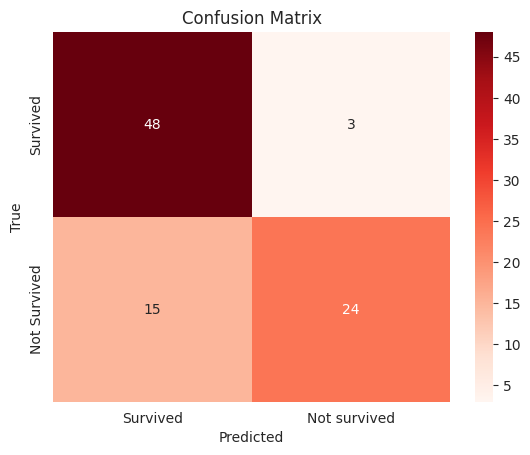

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Survived', 'Not survived'], yticklabels=['Survived', 'Not Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(y_test, rf_pre)

In [118]:
import numpy as np
def predict_survival(model, new_data):
  #Predicts whether a person will survive or not based on the provided model and new data.
  # Convert new_data to a NumPy array
  new_data_array = np.asarray(new_data)
  # Reshape the array to match the model input format
  new_data_reshaped = new_data_array.reshape(1, -1)
  # Make a prediction
  prediction = model.predict(new_data_reshaped)[0]
  # Return the corresponding survival status
  if prediction == 0:
    return "Not Survived"
  else:
    return "Survived"
# Example usage
new_data = [[2,	1,	38.0,	1,	0,	71.2833,	False,	False,	False]]
survival_prediction = predict_survival(rf, new_data)
print(f"Prediction: {survival_prediction}")

Prediction: Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
